In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
cf.go_offline()
%matplotlib inline

In [3]:
test=pd.read_csv(r"C:\Users\Lenovo\Desktop\project_excile\attached_files\003 Course FAQs\Python-Data-Science-and-Machine-Learning-Bootcamp\Machine Learning Sections\Logistic-Regression\titanic_test.csv")

In [4]:
train=pd.read_csv(r"C:\Users\Lenovo\Desktop\project_excile\attached_files\003 Course FAQs\Python-Data-Science-and-Machine-Learning-Bootcamp\Machine Learning Sections\Logistic-Regression\titanic_train.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


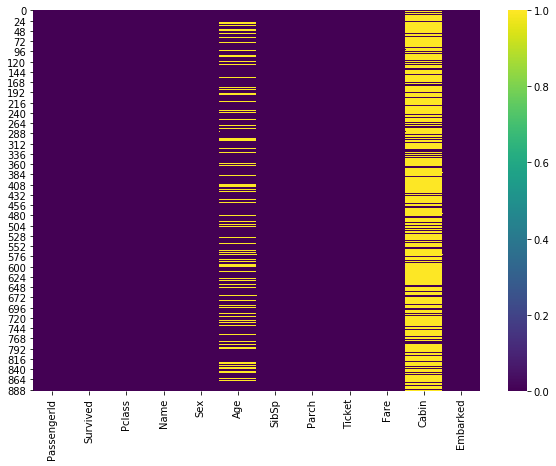

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(),cmap='viridis')

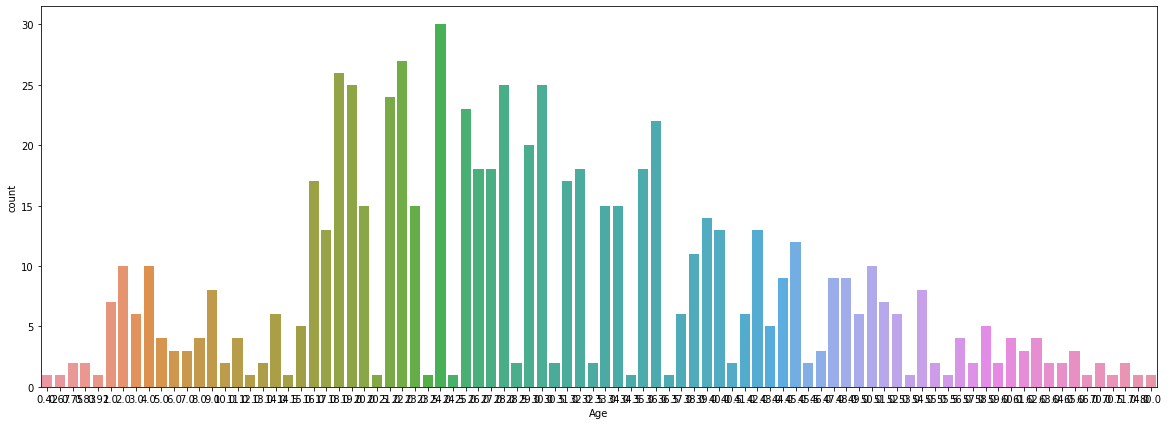

In [7]:
plt.figure(figsize=(20,7))
sns.countplot(x='Age',data=train)

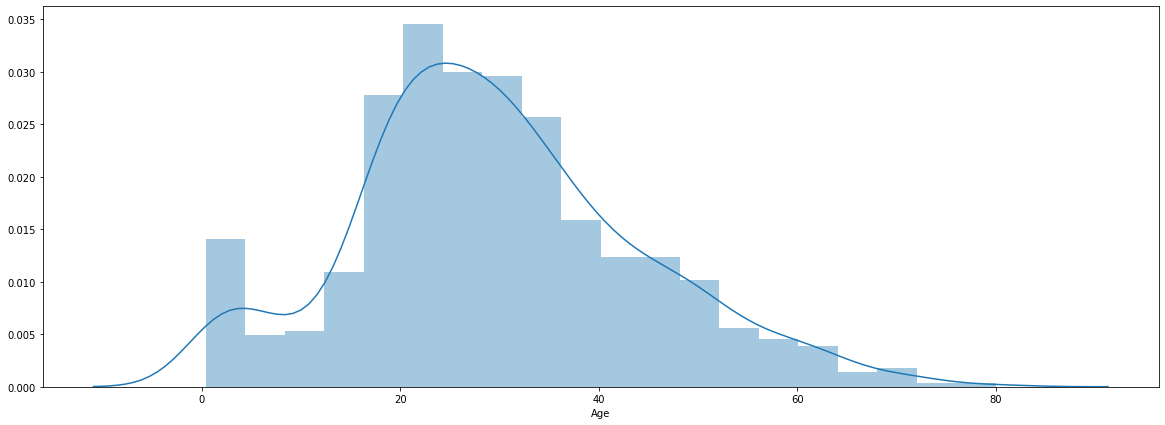

In [8]:
plt.figure(figsize=(20,7))
sns.distplot(train['Age'])

In [9]:
train['Age'].iplot(kind='histogram')

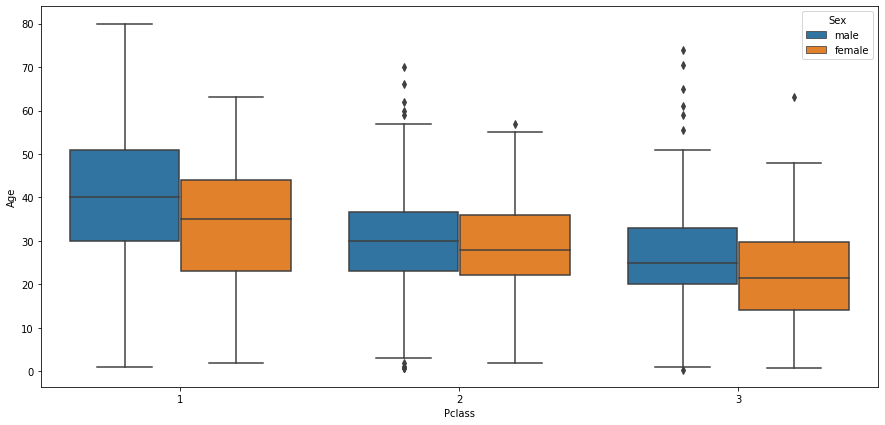

In [10]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Pclass',y='Age',data=train,hue='Sex')

In [11]:
px.box(train,x='Pclass',y='Age',points='all',color='Sex')

In [12]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [13]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [14]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [15]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [16]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [18]:
train=pd.concat([train,sex,embark],axis=1)

In [19]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [20]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


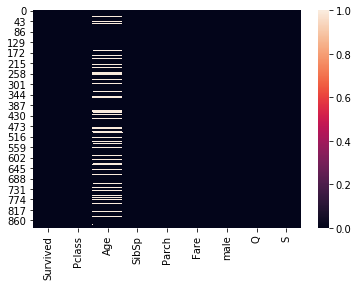

In [21]:
sns.heatmap(train.isnull())

In [22]:
def impute_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    male = cols[2]
    
    if pd.isnull(Age):
        
        if (Pclass == 1 and male ==1):
            return 40
        if (Pclass == 1 and male ==0):
            return 35
       
         
        if (Pclass == 2 and male ==1):
            return 30
        if (Pclass == 2 and male ==0):
            return 28
         
        if (Pclass == 3 and male ==1):
            return 25
        if (Pclass == 3 and male ==0):
            return 21    
       
    else:
        return Age

In [23]:
train['Age']=train[['Age','Pclass','male']].apply(impute_ages,axis=1)

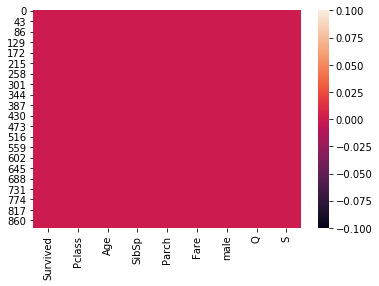

In [24]:
sns.heatmap(train.isnull())

In [25]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,21.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


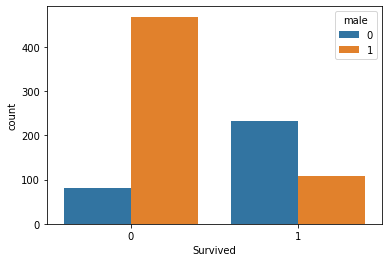

In [26]:
sns.countplot(x='Survived',hue='male',data=train)

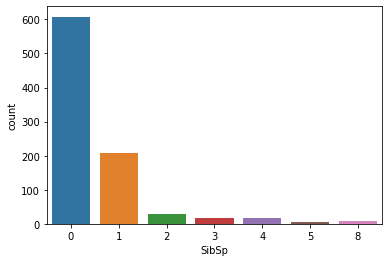

In [27]:
sns.countplot(x='SibSp',data=train)

In [28]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [30]:
logmodel.fit(X,y)

C:\Users\Lenovo\Anaconda3\envs\1st_project\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [33]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [34]:
sex=pd.get_dummies(test['Sex'],drop_first=True)

In [35]:
embark=pd.get_dummies(test['Embarked'],drop_first=True)

In [36]:
test=pd.concat([test,sex,embark],axis=1)

In [37]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,1,0,1
414,1,female,39.0,0,0,108.9000,C,0,0,0
415,3,male,38.5,0,0,7.2500,S,1,0,1
416,3,male,NaN,0,0,8.0500,S,1,0,1


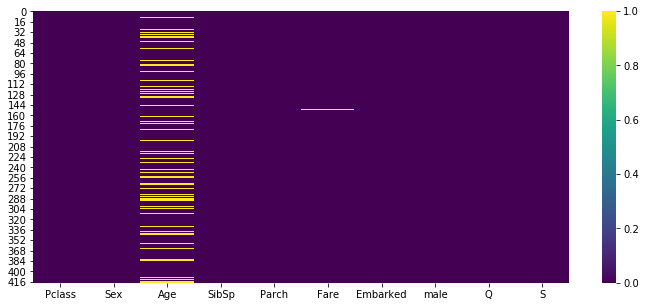

In [38]:
plt.figure(figsize=(12,5))
sns.heatmap(test.isnull(),cmap='viridis')

In [39]:
px.box(test,x='Pclass',y='Age',color='male')

In [40]:
def mutilate_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    male = cols[2]
    
    if pd.isnull(Age):
        
        if (Pclass == 1 and male ==1):
            return 42
        if (Pclass == 1 and male ==0):
            return 41
       
         
        if (Pclass == 2 and male ==1):
            return 28
        if (Pclass == 2 and male ==0):
            return 24
         
        if (Pclass == 3 and male ==1):
            return 24
        if (Pclass == 3 and male ==0):
            return 22    
       
    else:
        return Age

In [41]:
test['Age']=train[['Age','Pclass','male']].apply(mutilate_ages,axis=1)

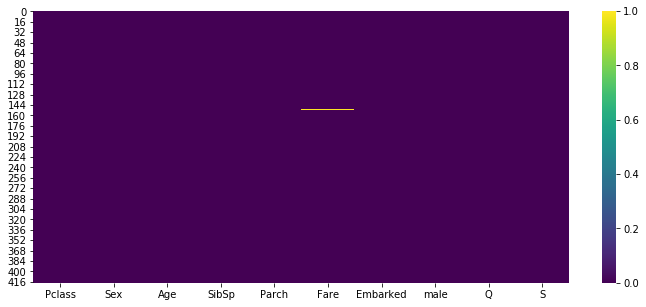

In [42]:
plt.figure(figsize=(12,5))
sns.heatmap(test.isnull(),cmap='viridis')

In [43]:
px.box(test,x='Pclass',y='Fare',color='male')

In [44]:
def mutilate_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    male = cols[2]
    
    if pd.isnull(Fare):
        
        if (Pclass == 1 and male ==1):
            return 52
        if (Pclass == 1 and male ==0):
            return 79
       
         
        if (Pclass == 2 and male ==1):
            return 13
        if (Pclass == 2 and male ==0):
            return 26
         
        if (Pclass == 3 and male ==1):
            return 8
        if (Pclass == 3 and male ==0):
            return 16    
       
    else:
        return Fare

In [45]:
test['Fare']=train[['Fare','Pclass','male']].apply(mutilate_fare,axis=1)

In [46]:
test.drop(['Sex','Embarked'],axis=1,inplace=True)

In [47]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,0,0,7.2500,1,1,0
1,3,38.0,1,0,71.2833,0,0,1
2,2,26.0,0,0,7.9250,1,1,0
3,3,35.0,0,0,53.1000,1,0,1
4,3,35.0,1,1,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,0.0000,1,0,1
414,1,44.0,0,0,7.9250,0,0,0
415,3,21.0,0,0,8.0500,1,0,1
416,3,34.0,0,0,32.5000,1,0,1


In [48]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,21.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [49]:
predictions=logmodel.predict(test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
test['Survived predictions']=predictions

In [52]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived predictions
0,3,22.0,0,0,7.2500,1,1,0,0
1,3,38.0,1,0,71.2833,0,0,1,0
2,2,26.0,0,0,7.9250,1,1,0,0
3,3,35.0,0,0,53.1000,1,0,1,0
4,3,35.0,1,1,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,0.0000,1,0,1,0
414,1,44.0,0,0,7.9250,0,0,0,1
415,3,21.0,0,0,8.0500,1,0,1,0
416,3,34.0,0,0,32.5000,1,0,1,0


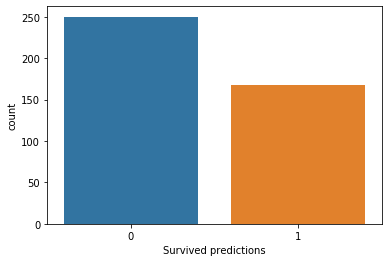

In [53]:
sns.countplot(test['Survived predictions'])

In [54]:
test['PassengerId']=np.arange(892,1310)

In [55]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived predictions,PassengerId
0,3,22.0,0,0,7.2500,1,1,0,0,892
1,3,38.0,1,0,71.2833,0,0,1,0,893
2,2,26.0,0,0,7.9250,1,1,0,0,894
3,3,35.0,0,0,53.1000,1,0,1,0,895
4,3,35.0,1,1,8.0500,0,0,1,0,896
...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,0.0000,1,0,1,0,1305
414,1,44.0,0,0,7.9250,0,0,0,1,1306
415,3,21.0,0,0,8.0500,1,0,1,0,1307
416,3,34.0,0,0,32.5000,1,0,1,0,1308


In [56]:
submissiontitanic=test[['PassengerId','Survived predictions']]

In [61]:
submissiontitanic

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
submissiontitanic.to_csv('submissiontitanic')

In [59]:
submissiontitanic.rename(columns={'Survived predictions':'Survived'},inplace=True)

In [60]:
submissiontitanic.to_csv('titanicsub',index=False)

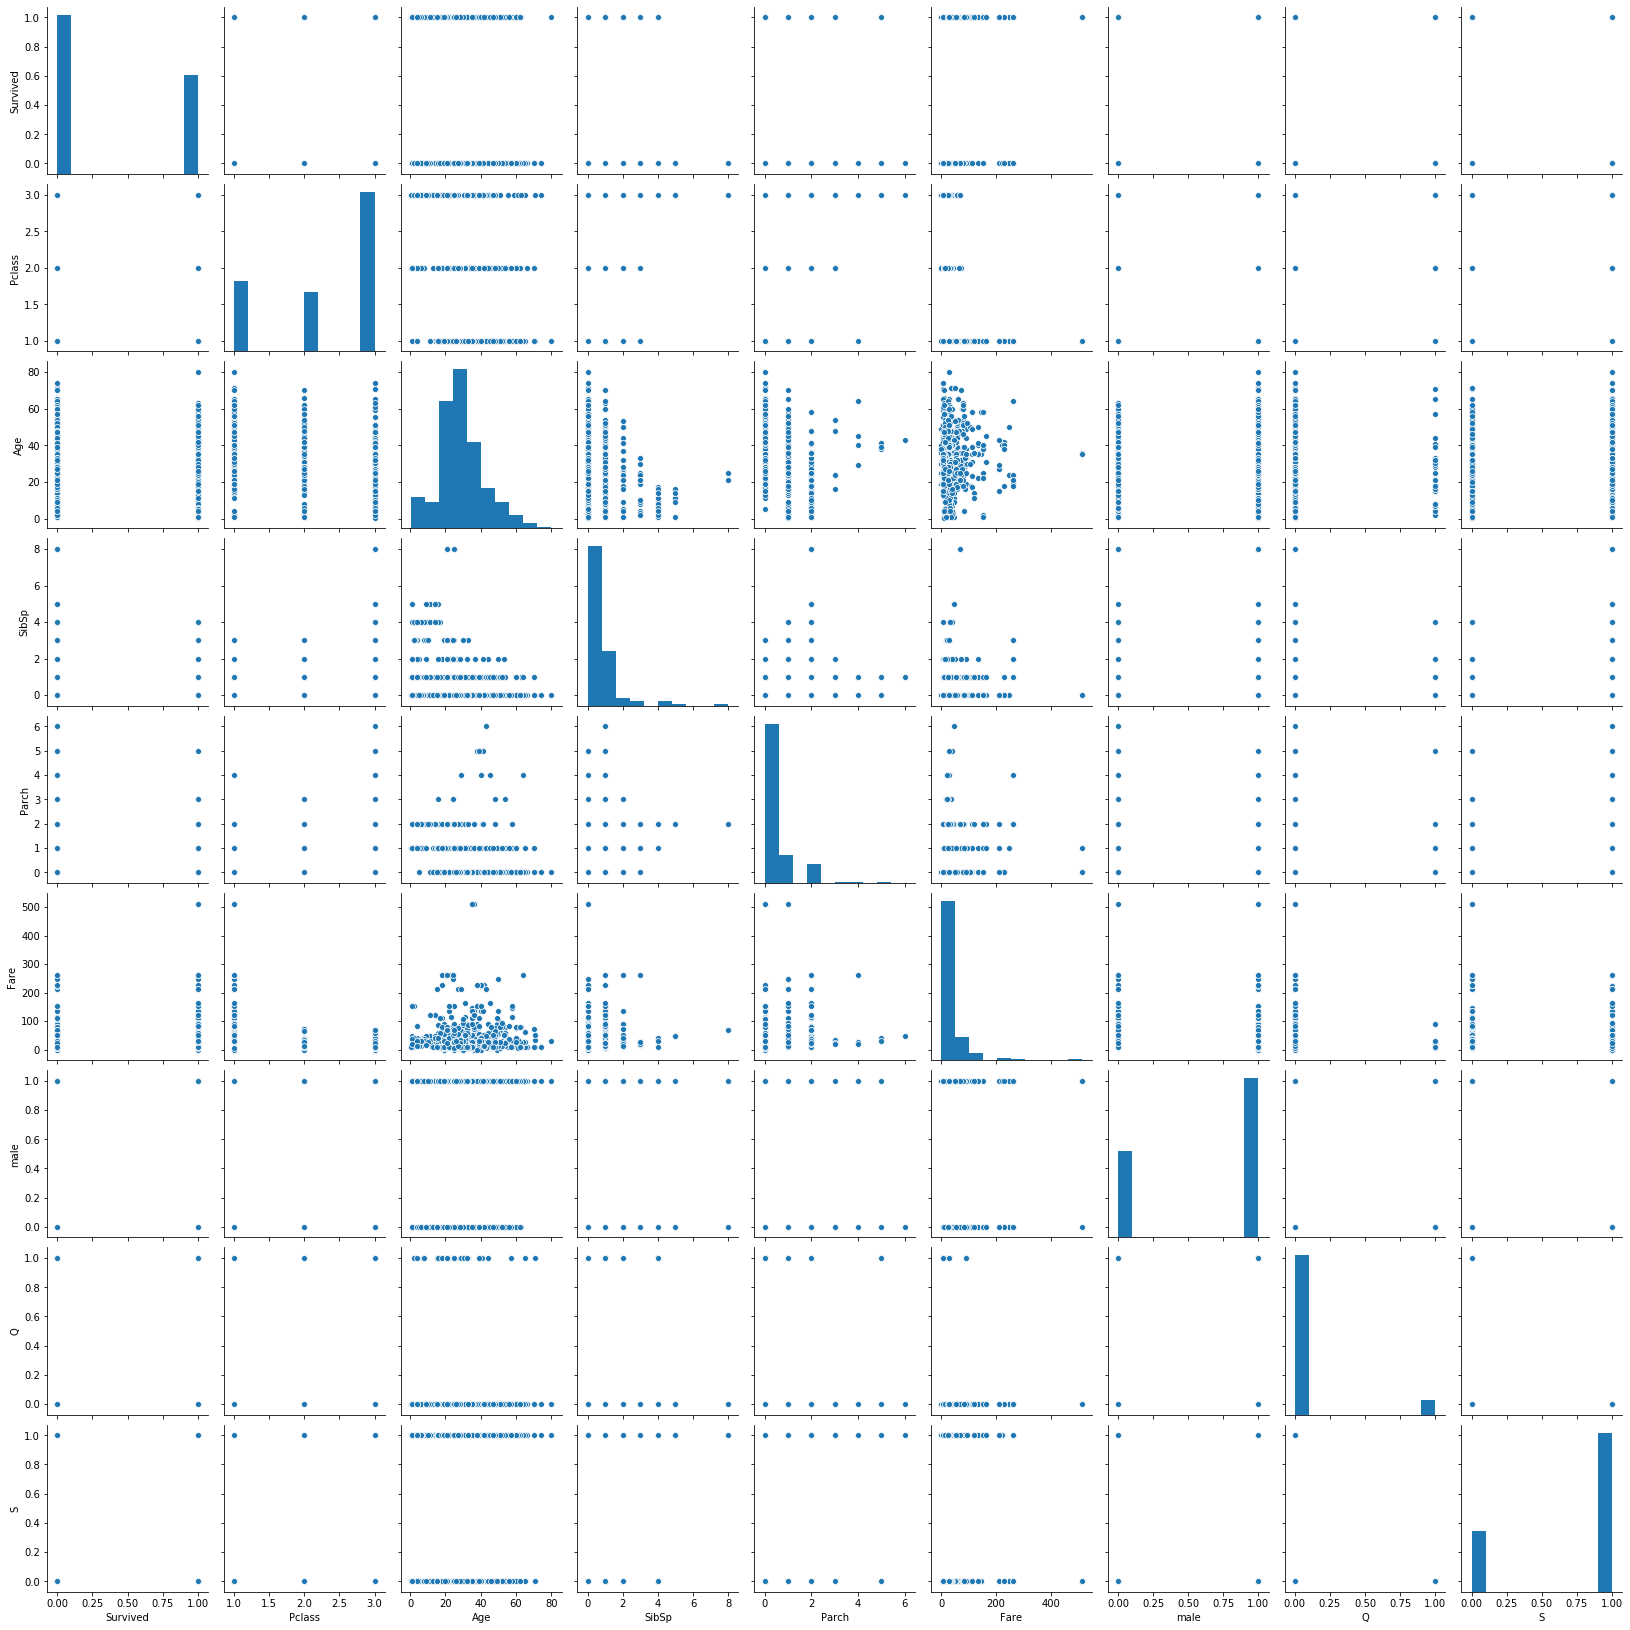

In [62]:
sns.pairplot(train)